In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re     
import nltk  
import string 

## **Data 1 Public Speaking Class Event ERI**

In [2]:
data = pd.read_excel("/content/drive/My Drive/Colab Notebooks/PunyaMereka/10_12_2021 Public Speaking Class Event (FIX).xlsx")

In [3]:
data.head()

,Timestamp,ID,"Setelah mengikuti acara kami, seberapa percaya dirikah Anda untuk melakukan Public Speaking?",Ket,"Setelah mengikuti acara kami, pahamkah Anda dengan cara Public Speaking yang baik?",Ket.1,"Setelah mengikuti acara kami, seberapa pahamkah Anda dengan materi yang disampaikan?",Ket.2,"Menurut Anda, seberapa memuaskan kah topik yang disajikan di acara ini?",Ket.3,Mohon untuk memberikan rating untuk instruktur.,Ket.4,"Mohon untuk memberikan rating kelas ""Public Speaking""",Ket.5,Seberapa bermanfaat kah acara ini dalam membantu Anda dalam melakukan Public Speaking kedepannya?,Ket.6,"Dari skala 1-10, seberapa mungkin Anda merekomendasikan Masterclass ""Public Speaking"" Class?",Hal apa yang paling Anda sukai dari acara ini?,Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?,"MyEduSolve akan selalu membantumu dalam meraih masa depan impian, yuk kasih ide buat topik webinar selanjutnya!"
0,2021-12-10 15:03:57.507,1026.0,4,Puas,4,Puas,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,10,penyampaian materi yang mudah dipahami dan tem...,diperbanyak webinarwebinar gratis kak hehe,bidang HR mungkin kak seperti talent acqusitio...
1,2021-12-10 14:35:58.362,1062.0,4,Puas,4,Puas,4,Puas,4,Puas,4,Puas,4,Puas,5,Puas,8,sesi tanya jawab,NaN,NaN
2,2021-12-10 14:37:27.172,1199.0,4,Puas,4,Puas,4,Puas,5,Puas,5,Puas,4,Puas,5,Puas,9,Penyampaian speaker yang aplikatif,Workshop aplikasi langsung,HR
3,2021-12-10 14:36:46.741,1236.0,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,10,Pemateri menguasai dan ketepatan waktu,"Berikan pdf kepada peserta, selain link materi...",Content writer
4,2021-12-10 14:37:50.971,1276.0,4,Puas,5,Puas,4,Puas,5,Puas,5,Puas,5,Puas,5,Puas,9,"Penyajian materinya singkat, padat, dan jelas",Acaranya sudah cukup baik,Wawancara Kerja


In [4]:
datapds = data['Hal apa yang paling Anda sukai dari acara ini?']
datapds.head()

0    penyampaian materi yang mudah dipahami dan tem...
1                                    sesi tanya jawab 
2                   Penyampaian speaker yang aplikatif
3               Pemateri menguasai dan ketepatan waktu
4        Penyajian materinya singkat, padat, dan jelas
Name: Hal apa yang paling Anda sukai dari acara ini?, dtype: object

In [5]:
def cleaningText(text):
  text = re.sub(r'[0-9]+', '', text) # remove numbers
  text = text.replace('\n', ' ') # replace new line into space
  text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
  text = text.strip(' ') # remove characters space from both left and right text
  return text

In [6]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

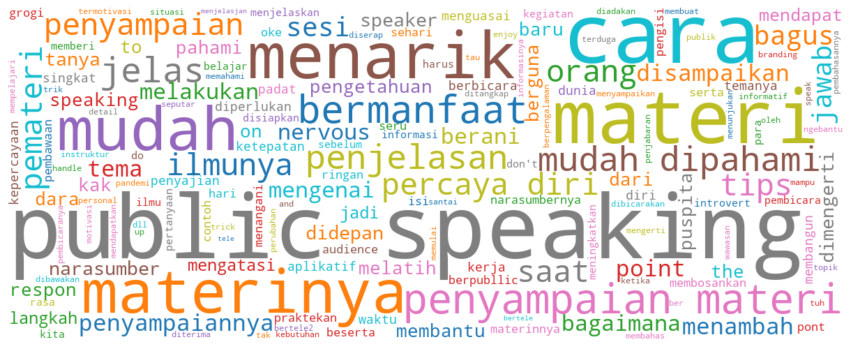

<Figure size 432x288 with 0 Axes>

In [7]:
data['Hal apa yang paling Anda sukai dari acara ini?'] = data['Hal apa yang paling Anda sukai dari acara ini?'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali']

# Create and generate a word cloud image:
ide_words = ' '.join(data['Hal apa yang paling Anda sukai dari acara ini?'].dropna().values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

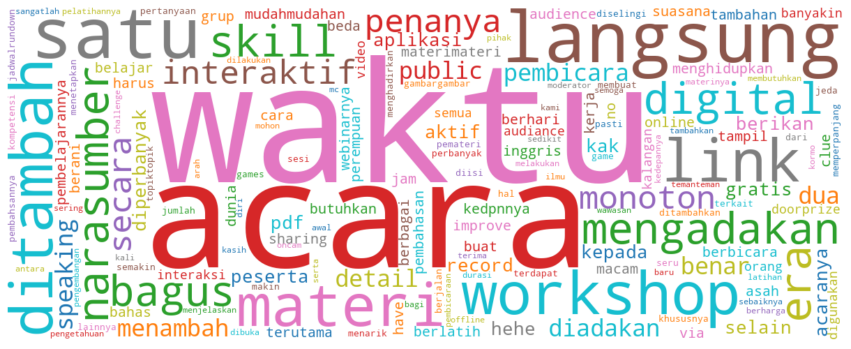

In [8]:
data['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'] = data['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali']

# Create and generate a word cloud image:
ide_words = ' '.join(data['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'].dropna().apply(cleaningText).values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Hal Yang Perlu Diimprove Menurut Peserta', size=20, color='green', pad=15)
plt.axis("off")
plt.show()

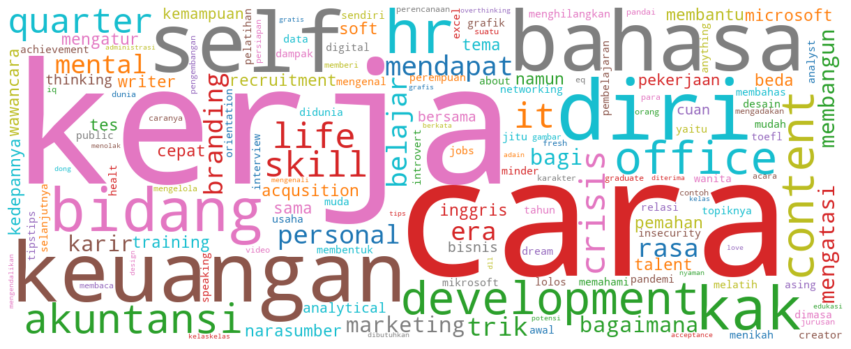

In [9]:
data['MyEduSolve akan selalu membantumu dalam meraih masa depan impian, yuk kasih ide buat topik webinar selanjutnya!'] = data['MyEduSolve akan selalu membantumu dalam meraih masa depan impian, yuk kasih ide buat topik webinar selanjutnya!'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang']

# Create and generate a word cloud image:
ide_words = ' '.join(data['MyEduSolve akan selalu membantumu dalam meraih masa depan impian, yuk kasih ide buat topik webinar selanjutnya!'].dropna().apply(cleaningText).values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Hal Yang Perlu Diimprove Menurut Peserta', size=20, color='green', pad=15)
plt.axis("off")
plt.show()

## **Data 2 Post Survey Role of Data Science ERI**

In [10]:
data2 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/PunyaMereka/29_10_2021 Post Survey_ Role of Data Science in the Office Workshop (FIX).xlsx")

In [11]:
data2.head()

,Timestamp,ID,"Setelah mengikuti acara kami, seberapa percaya diri kah Anda dengan pemahaman dasar Anda dalam data science?",Ket,"Setelah mengikuti acara kami, seberapa familier kah Anda dengan cara aplikasi data science di dunia profesional?",Ket.1,"Setelah mengikuti acara kami, seberapa pahamkah Anda dengan penggunaan data pada data science?",Ket.2,"Menurut Anda, seberapa memuaskan kah topik yang disajikan di acara ini?",Ket.3,Mohon untuk memberikan rating untuk instruktur / speaker.,Ket.4,Silakan berikan penilaian terhadap acara secara keseluruhan.,Ket.5,Seberapa memanfaat kah acara ini dalam membantu Anda meningkatkan kemampuan Anda dalam menemukan pekerjaan yang cocok?,Ket.6,"Dari skala 110, seberapa mungkin Anda merekomendasikan acara/program MyEduSolve kepada orang lain?",Hal apa yang paling Anda sukai dari acara ini?,Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?,"MyEduSolve akan selalu membantumu dalam meraih masa depan impian, yuk kasih ide buat topik webinar selanjutnya!"
0,2021-10-29 17:26:37.507,2447.0,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,9,Materinya,NaN,NaN
1,2021-10-29 17:26:46.826,1635.0,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,10,NaN,NaN,NaN
2,2021-10-29 17:27:44.463,4278.0,4,Puas,3,Cukup Puas,4,Puas,4,Puas,5,Puas,5,Puas,4,Puas,8,NaN,NaN,NaN
3,2021-10-29 17:28:03.885,9594.0,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,5,Puas,10,Materinya padat walau waktu singkat,sudah bagus,K3 Konstruksi
4,2021-10-29 17:28:20.663,2071.0,5,Puas,4,Puas,4,Puas,5,Puas,5,Puas,4,Puas,4,Puas,8,NaN,NaN,NaN


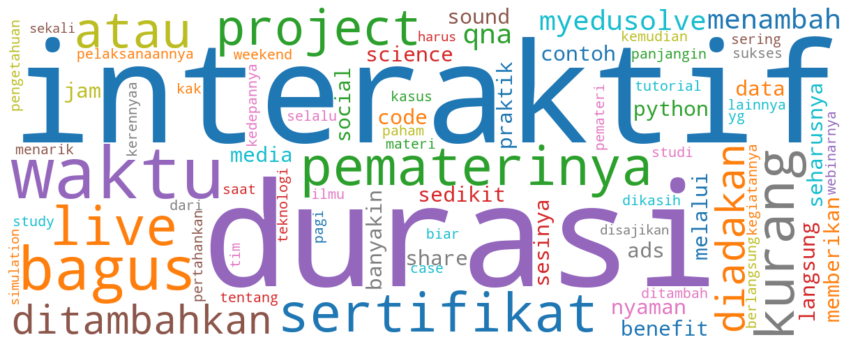

In [12]:
data2['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'] = data2['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk']

# Create and generate a word cloud image:
ide_words = ' '.join(data2['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'].dropna().apply(cleaningText).values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Hal Yang Perlu Diimprove Menurut Peserta', size=20, color='green', pad=15)
plt.axis("off")
plt.show()

## **Data 4 Life at Start-Up DHIYA**

In [13]:
data4 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/PunyaMereka/19_11_2021 Life at Start-Up.xlsx")
data4

,Timestamp,ID,Apakah webinar yang diadakan membantu Anda mendapatkan pekerjaan yang Anda inginkan?,Apakah webinar yang diadakan membantu Anda mendapatkan pekerjaan yang Anda inginkan?2,Apakah workshop yang diadakan membantu Anda meningkatkan keinginan anda untuk terjun di dunia edukasi?,Apakah workshop yang diadakan membantu Anda meningkatkan keinginan anda untuk terjun di dunia edukasi?,Apa saja yang Anda sukai dari webinar yang diadakan?,Apakah ada saran yang hendak Anda berikan mengenai konten webinar yang telah diadakan?,Seberapa handal instruktur Anda dalam menyampaikan materi webinar yang disajikan?,Seberapa handal instruktur Anda dalam menyampaikan materi webinar yang disajikan?,Hal apa saja yang Anda sukai dari instruktur webinar yang diadakan?,Apakah ada hal lain yang bisa kami berikan untuk membantu Anda menemukan pekerjaan kedepannya?
0,2021-11-19 14:05:57.034,7116,4,Puas,4,Puas,"Topik yang disajikan menarik, Materi yang disa...",-,5,Puas,Cara penyampaian konten yang jelas,-
1,2021-11-19 14:08:31.010,5862,4,Puas,5,Puas,"Topik yang disajikan menarik, Materi yang disa...",Mengenai IT,4,Puas,Intonasi dan gaya bahasa yang membuat kelas ti...,CV dan Resume
2,2021-11-19 14:09:20.198,4809,4,Puas,4,Puas,"Topik yang disajikan menarik, Materi yang disa...","Menggunakan aplikasi lain, karna masih bingung...",4,Puas,Intonasi dan gaya bahasa yang membuat kelas ti...,bagaimana cara memotivasi diri agar lebih optimal
3,2021-11-19 14:09:41.481,9967,4,Puas,3,Cukup Puas,"Topik yang disajikan menarik, Materi yang disa...","Tadi ada kendala teknis, seperti audio yang ti...",4,Puas,Intonasi dan gaya bahasa yang membuat kelas ti...,Informasi mengenai lowongan pekerjaan
4,2021-11-19 14:10:20.355,5572,4,Puas,4,Puas,Topik yang disajikan menarik,Sudah baik,4,Puas,Cara penyampaian konten yang jelas,"Job fair, webinar karir"
5,2021-11-19 14:10:47.801,5031,4,Puas,4,Puas,"Topik yang disajikan menarik, Materi yang disa...","Beberapa masalah teknis masih dialami, mungkin...",5,Puas,Slide presentasi yang disajikan menarik,.
6,2021-11-19 14:10:49.928,3002,4,Puas,4,Puas,"Topik yang disajikan menarik, Materi yang disa...",Mungkin bisa di adakan sesi selanjutnya,5,Puas,Cara penyampaian konten yang jelas,Mungkin bisa di buatkan Group Loker bagi Fresh...
7,2021-11-19 14:12:12.338,8549,4,Puas,3,Cukup Puas,"Topik yang disajikan menarik, Materi yang disa...",-,4,Puas,Intonasi dan gaya bahasa yang membuat kelas ti...,-
8,2021-11-19 14:13:24.487,3431,4,Puas,3,Cukup Puas,Materi yang disajikan memperluas wawasan Anda ...,Konten webinar yang disajikan sudah sangat pen...,4,Puas,Slide presentasi yang disajikan menarik,Pengetahuan tentang apa yang akan dikerjakan d...
9,2021-11-19 14:13:50.657,7836,3,Cukup Puas,3,Cukup Puas,"Topik yang disajikan menarik, Materi yang disa...",Dunia pekerjaan,4,Puas,Slide presentasi yang disajikan menarik,Mengadakan pelatihan dalan memasuki dunia peke...


In [14]:
data4.columns

Index(['Timestamp', 'ID',
       'Apakah webinar yang diadakan membantu Anda mendapatkan pekerjaan yang Anda inginkan?',
       'Apakah webinar yang diadakan membantu Anda mendapatkan pekerjaan yang Anda inginkan?2',
       'Apakah workshop yang diadakan membantu Anda meningkatkan keinginan anda untuk terjun di dunia edukasi? ',
       'Apakah workshop yang diadakan membantu Anda meningkatkan keinginan anda untuk terjun di dunia edukasi?',
       'Apa saja yang Anda sukai dari webinar yang diadakan? ',
       'Apakah ada saran yang hendak Anda berikan mengenai konten webinar yang telah diadakan?',
       'Seberapa handal instruktur Anda dalam menyampaikan materi webinar yang disajikan? ',
       'Seberapa handal instruktur Anda dalam menyampaikan materi webinar yang disajikan?',
       'Hal apa saja yang Anda sukai dari instruktur webinar yang diadakan? ',
       'Apakah ada hal lain yang bisa kami berikan untuk membantu Anda menemukan pekerjaan kedepannya?'],
      dtype='object')

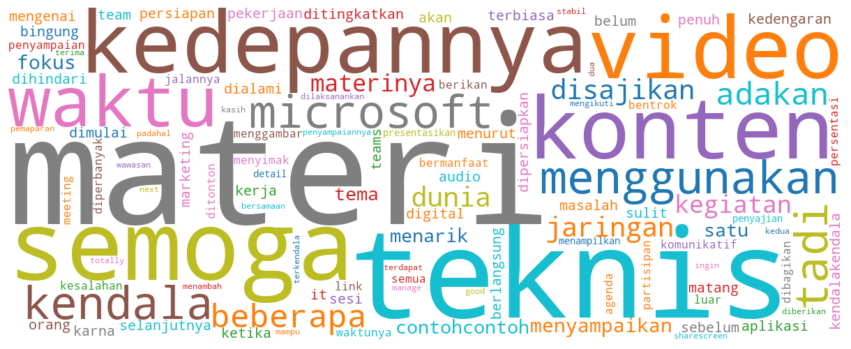

In [15]:
data4['Apakah ada saran yang hendak Anda berikan mengenai konten webinar yang telah diadakan?'] = data4['Apakah ada saran yang hendak Anda berikan mengenai konten webinar yang telah diadakan?'].str.lower()


# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali']

# Create and generate a word cloud image:
ide_words = ' '.join(data4['Apakah ada saran yang hendak Anda berikan mengenai konten webinar yang telah diadakan?'].dropna().apply(cleaningText).values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Hal Yang Perlu Diimprove Menurut Peserta', size=20, color='green', pad=15)
plt.axis("off")
plt.show()

## **Data 5 Pre-Survey_ Pahami Microsoft Excel Dengan Mudah Nahdah**

In [16]:
data5 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/PunyaMereka/16_8_2021 Pre-Survey_ Pahami Microsoft Excel Dengan Mudah.xlsx")
data5

,ID,Jenis Kelamin (Error),Jenis Kelamin,Tanggal Lahir (DD/MM/YYYY),Domisili (Error),Domisili (Provinsi),Apa yang kamu harapkan dari pelatihan yang Kamu ikuti?,Lainnya,Seberapa percaya dirikah Kamu dalam menggunakan Microsoft Excel? (Tidak percaya diri sama sekali - sangat percaya diri),Seberapa percaya dirikah Kamu dalam menggunakan Microsoft Excel? (Tidak percaya diri sama sekali - sangat percaya diri).1,Seberapa mahir keahlian Kamu dalam menggunakan Microsoft Excel?(Pemula - ahli),Seberapa mahir keahlian Kamu dalam menggunakan Microsoft Excel?(Pemula - ahli).1,Apa saja tantangan yang Kamu hadapi saat menggunakan Microsoft Excel?,Hal lain apa yang dapat dilakukan MyEduSolve untuk membantu Kamu?,Lainnya.1
0,1.289516e+10,Perempuan,Perempuan,2000-10-26 00:00:00,Bekasi,Jawa Barat,Peningkatan Skill,NaN,7.000000,Percaya diri,5.000000,Kurang mahir,Rumus didalam excel,Mengaplikasikan produktivitas dalam bekerja,NaN
1,1.289475e+10,Perempuan,Perempuan,30/06/2000,Kudus,Jawa Tengah,Peningkatan Skill,NaN,5.000000,Kurang percaya diri,5.000000,Kurang mahir,Penggunaan rumus dalam microsoft excel,Rekomendasi industri yang sesuai dengan passion,NaN
2,1.289466e+10,perempuan,Perempuan,10/04/1999,Bekasi,Jawa Barat,Peningkatan Skill,NaN,6.000000,Kurang percaya diri,6.000000,Kurang mahir,function di excel,Mengaplikasikan produktivitas dalam bekerja,NaN
3,1.289464e+10,Perempuan,Perempuan,1999-12-18 00:00:00,Kalbar,Kalimantan Barat,Belajar hal baru,NaN,5.000000,Kurang percaya diri,5.000000,Kurang mahir,Memahami rumus agak susah,Mengaplikasikan produktivitas dalam bekerja,NaN
4,1.289464e+10,Perempuan,Perempuan,09/09/1997,D.I.Yogyakarta,Daerah Istimewa Yogyakarta,Peningkatan Skill,NaN,10.000000,Sangat percaya diri,5.000000,Kurang mahir,1. Masalah beda versi pada MS Excel 2. Permas...,Rekomendasi industri yang sesuai dengan passion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1.288654e+10,Perempuan,Perempuan,13/10/1999,Kab. Bekasi,Jawa Barat,Belajar dari orang yang berpengalaman,NaN,4.000000,Tidak percaya diri,4.000000,Tidak mahir,Belum familiar dengan fitur2nya,Membangun Networking,NaN
286,1.288654e+10,Perempuan,Perempuan,1997-11-18 00:00:00,Bogor,Jawa Barat,Peningkatan Skill,NaN,7.000000,Percaya diri,5.000000,Kurang mahir,lupa rumus dan bingung harus pakai rumus apa,Konsultasi pengembangan diri dalam mencapai Goal,NaN
287,1.288649e+10,Perempuan,Perempuan,12/04/2001,Sulawesi Selatan,Sulawesi Selatan,Peningkatan Skill,NaN,5.000000,Kurang percaya diri,5.000000,Kurang mahir,Sering lupa cara menggunakan rumus atau formul...,Konsultasi pengembangan diri dalam mencapai Goal,NaN
288,1.288647e+10,Female,Perempuan,05/07/2003,"Gresik, Jawa Timur",Jawa Timur,Lainnya,Semuanya,4.000000,Tidak percaya diri,4.000000,Tidak mahir,Kurang wawasan tentang formula formula yang da...,Konsultasi pengembangan diri dalam mencapai Goal,NaN


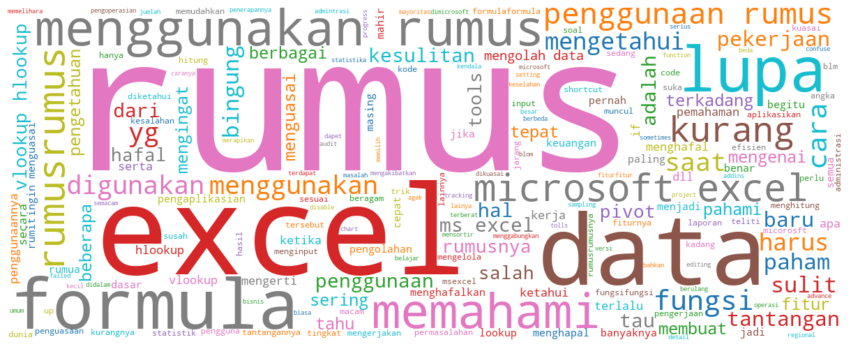

In [17]:
data5['Apa saja tantangan yang Kamu hadapi saat menggunakan Microsoft Excel?'] = data5['Apa saja tantangan yang Kamu hadapi saat menggunakan Microsoft Excel?'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali','belum']

# Create and generate a word cloud image:
ide_words = ' '.join(data5['Apa saja tantangan yang Kamu hadapi saat menggunakan Microsoft Excel?'].dropna().apply(cleaningText).values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Hal Yang Perlu Diimprove Menurut Peserta', size=20, color='green', pad=15)
plt.axis("off")
plt.show()

## **Data 6 Pre-Survey_ Rumus Excel Untuk Pekerja Kantoran Nahdah**

In [18]:
data6 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/PunyaMereka/27_10_2021 Pre-Survey_ Rumus Excel Untuk Pekerja Kantoran.xlsx")
data6

,Timestamp,ID,Usia,Provinsi,Jenis Kelamin,Saya adalah seorang… (pilih sesuai identitas kamu),Pendidikan terakhir,Apakah Anda pernah mengikuti kelas MyEduSolve sebelumnya?,Apakah Anda pernah menggunakan Microsoft Excel dalam dunia kerja?,Seberapa percaya dirikah Anda untuk menggunakan fungsi dan rumus dalam Microsoft Excel?,...,"Seberapa pahamkah Anda dalam menggunakan rurmus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [COUNTIF, SUMIF]","Seberapa pahamkah Anda dalam menggunakan rurmus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [COUNTIF, SUMIF].1","Seberapa pahamkah Anda dalam menggunakan rurmus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [Perhitungan dasar (basic calculations)]","Seberapa pahamkah Anda dalam menggunakan rurmus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [Perhitungan dasar (basic calculations)].1","Seberapa pahamkah Anda dalam menggunakan rurmus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [VLOOKUP]","Seberapa pahamkah Anda dalam menggunakan rurmus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [VLOOKUP].1","Seberapa pahamkah Anda dalam menggunakan rurmus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [HLOOKUP]","Seberapa pahamkah Anda dalam menggunakan rurmus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [HLOOKUP].1",Apa yang kamu harapkan dari pelatihan yang Kamu ikuti?,Apa saja tantangan yang kamu hadapi selama menggunakan Microsoft Excel?
0,2021-10-26 09:26:58.962,1591,23,Jawa Barat,Perempuan,Pekerja profesional,D1 - D4,Tidak Pernah,Pernah,3,...,2,Tidak paham,2,Tidak paham,2,Tidak paham,2,Tidak paham,Peningkatan Skill,Rumus2 nya
1,2021-10-26 09:27:34.107,7627,22,Daerah Khusus Ibukota Jakarta,Perempuan,Fresh graduate,S1 - S3,Tidak Pernah,Tidak Pernah,3,...,3,Kurang paham,5,Sangat paham,2,Tidak paham,2,Tidak paham,Peningkatan Skill,"Kurangnya latihan soal, kurangnya praktek"
2,2021-10-26 09:27:34.673,9388,25,Jawa Timur,Laki-laki,Pencari kerja,S1 - S3,Tidak Pernah,Pernah,3,...,3,Kurang paham,4,Paham,4,Paham,4,Paham,Belajar hal baru,Saya kurang paham dalam penerapan di dunia kerja
3,2021-10-26 09:27:51.748,8213,24,Banten,Perempuan,Fresh graduate,S1 - S3,Tidak Pernah,Pernah,5,...,2,Tidak paham,3,Kurang paham,2,Tidak paham,2,Tidak paham,Belajar hal baru,Banyak rumus yg harus di ingat dalam microsoft...
4,2021-10-26 09:28:02.939,5706,18,Jawa Barat,Laki-laki,Pencari kerja,SMA/SMK,Tidak Pernah,Tidak Pernah,5,...,1,Tidak paham sama sekali,2,Tidak paham,1,Tidak paham sama sekali,1,Tidak paham sama sekali,Belajar hal baru,Tidak ada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2021-10-28 13:13:25.291,1313,18,Jawa Barat,Laki-laki,Fresh graduate,SMA/SMK,Tidak Pernah,Tidak Pernah,3,...,3,Kurang paham,3,Kurang paham,1,Tidak paham sama sekali,1,Tidak paham sama sekali,Peningkatan Skill,ingin bisa mengusai berbagai masalah dan cara ...
393,2021-11-01 20:15:40.882,9166,22,Riau,Perempuan,Fresh graduate,S1 - S3,Tidak Pernah,Pernah,4,...,4,Paham,4,Paham,4,Paham,4,Paham,Peningkatan Skill,Rumus
394,2021-11-02 18:48:40.441,6346,24,Jawa Barat,Laki-laki,Pencari kerja,S1 - S3,Tidak Pernah,Tidak Pernah,5,...,3,Kurang paham,4,Paham,2,Tidak paham,2,Tidak paham,Peningkatan Skill,"Menghafal rumus rumus baru,"
395,2021-11-03 21:15:16.133,4755,25,Jawa Barat,Perempuan,Pencari kerja,S1 - S3,Tidak Pernah,Tidak Pernah,5,...,2,Tidak paham,1,Tidak paham sama sekali,2,Tidak paham,2,Tidak paham,Peningkatan Skill,Bingung dengan rumusnya


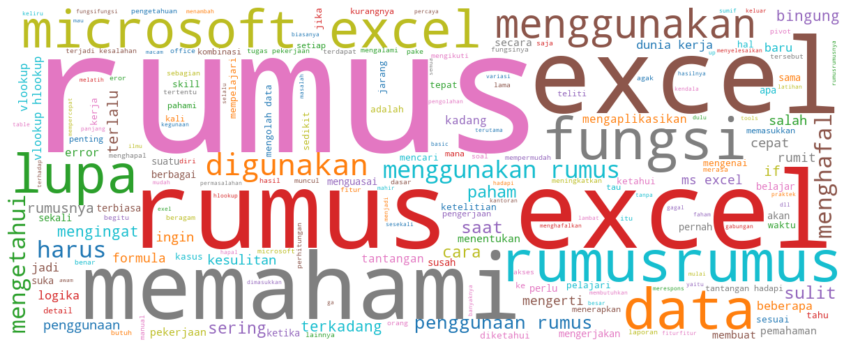

In [19]:
data6['Apa saja tantangan yang kamu hadapi selama menggunakan Microsoft Excel?'] = data6['Apa saja tantangan yang kamu hadapi selama menggunakan Microsoft Excel?'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali','kurang','dari','yg','belum']

# Create and generate a word cloud image:
ide_words = ' '.join(data6['Apa saja tantangan yang kamu hadapi selama menggunakan Microsoft Excel?'].dropna().apply(cleaningText).values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Hal Yang Perlu Diimprove Menurut Peserta', size=20, color='green', pad=15)
plt.axis("off")
plt.show()

## **Data 7 Pre-Survey_ English Language Workshop Nahdah**

In [20]:
data7 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/PunyaMereka/10_11_2021 Pre-Survey_ English Language Workshop.xlsx")
data7

,Timestamp,ID,Usia,Provinsi,Jenis Kelamin,Saya adalah seorang… (pilih sesuai identitas kamu),Pendidikan terakhir,Apakah Anda pernah mengikuti kelas MyEduSolve sebelumnya?,Apa yang Anda harapkan dari pelatihan yang Anda ikuti?,Apakah Anda sudah menggunakan Bahasa Inggris dalam kegiatan Anda sehari - hari?,Seberapa percaya dirikah Anda dalam berbicara Bahasa Inggris? (skala),Seberapa percaya dirikah Anda dalam berbicara Bahasa Inggris?2,Seberapa percaya dirikah Anda dengan kemampuan dalam penggunaan tenses Bahasa Inggris? (skala),Seberapa percaya dirikah Anda dengan kemampuan dalam penggunaan tenses Bahasa Inggris?,Seberapa mahir Anda dalam memahami konsep dasar Tenses? (skala),Seberapa mahir Anda dalam memahami konsep dasar Tenses?2,Apa saja tantangan yang kamu hadapi saat menggunakan bahasa inggris?,Hal lain apa yang dapat dilakukan MyEduSolve untuk membantu Kamu?
0,2021-11-10 16:23:57.851,6533,22,Jawa Tengah,Laki-laki,Fresh graduate,S1 - S3,Pernah,Peningkatan Skill,Belum,3,Cukup percaya diri,5,Sangat percaya diri,4,Mahir,Pronounciation,Rekomendasi industri yang sesuai dengan passion
1,2021-11-10 16:24:10.561,7048,20,Jawa Barat,Laki-laki,Pencari kerja,SMA/SMK,Belum Pernah,Belajar dari orang yang berpengalaman,Belum,2,Tidak percaya diri,2,Tidak percaya diri,2,Tidak mahir,Susah dalam kosakata,Rekomendasi industri yang sesuai dengan passion
2,2021-11-10 16:24:10.938,5984,23,Jawa Barat,Laki-laki,Pencari kerja,SMA/SMK,Belum Pernah,Peningkatan Skill,Belum,3,Cukup percaya diri,3,Cukup percaya diri,3,Cukup mahir,Terkadang salah dalam menggunakan konjungsi,Rekomendasi industri yang sesuai dengan passion
3,2021-11-10 16:24:26.587,1147,21,Jawa Timur,Perempuan,Fresh graduate,S1 - S3,Belum Pernah,Peningkatan Skill,Belum,3,Cukup percaya diri,1,Sangat tidak percaya diri,2,Tidak mahir,Penggunaan tenses yang tidak tepat sehingga sa...,Konsultasi pengembangan diri dalam mencapai Goal
4,2021-11-10 16:24:53.374,7125,22,Jawa Timur,Perempuan,Fresh graduate,S1 - S3,Pernah,Peningkatan Skill,Belum,3,Cukup percaya diri,3,Cukup percaya diri,3,Cukup mahir,Mempelajari kosakata baru yang belum pernah sa...,Konsultasi pengembangan diri dalam mencapai Go...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2021-11-12 15:21:03.829,1890,22,Jawa Barat,Perempuan,Fresh graduate,S1 - S3,Belum Pernah,Belajar dari orang yang berpengalaman,Belum,4,Percaya diri,4,Percaya diri,4,Mahir,Kelemahan saya dalam mengingat beberapa kata d...,Rekomendasi industri yang sesuai dengan passio...
126,2021-11-12 15:29:57.341,2151,22,Jawa Tengah,Perempuan,Fresh graduate,S1 - S3,Belum Pernah,Belajar dari orang yang berpengalaman,Sudah,3,Cukup percaya diri,3,Cukup percaya diri,4,Mahir,Grammar,Rekomendasi industri yang sesuai dengan passio...
127,2021-11-12 15:39:10.467,2845,22,Banten,Perempuan,Fresh graduate,S1 - S3,Belum Pernah,Peningkatan Skill,Belum,1,Sangat tidak percaya diri,1,Sangat tidak percaya diri,2,Tidak mahir,kurang pede,Rekomendasi industri yang sesuai dengan passio...
128,2021-11-12 16:11:18.197,9707,22,Jawa Tengah,Perempuan,Fresh graduate,S1 - S3,Belum Pernah,Peningkatan Skill,Sudah,3,Cukup percaya diri,3,Cukup percaya diri,2,Tidak mahir,Belajar banyak menghadapi jenis tenses,Rekomendasi industri yang sesuai dengan passio...


Text(0.5, 1.0, 'Jumlah Peserta Yang Belum atau Sudah Pernah Mengikuti Kelas')

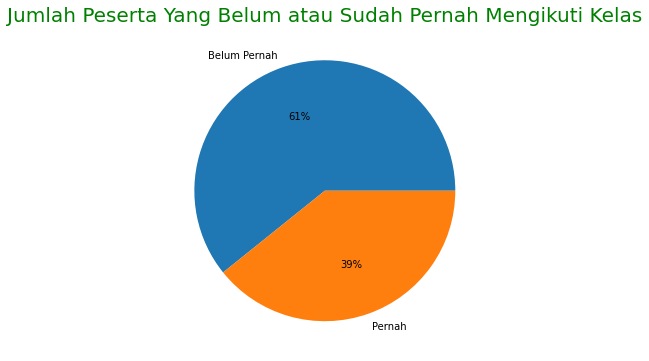

In [21]:
nilaipbp = data7['Apakah Anda pernah mengikuti kelas MyEduSolve sebelumnya?'].value_counts().values
judulpbp = data7['Apakah Anda pernah mengikuti kelas MyEduSolve sebelumnya?'].value_counts().index

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(nilaipbp, labels = judulpbp, autopct='%1.0f%%')
ax.set_title('Jumlah Peserta Yang Belum atau Sudah Pernah Mengikuti Kelas', color = 'green', size = 20)

Text(0.5, 1.0, 'Kemahiran Peserta Dalam Memahami Konsep Dasar Tenses')

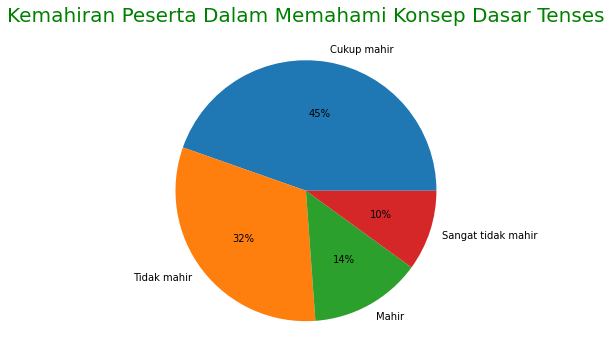

In [22]:
nilaimht = data7['Seberapa mahir Anda dalam memahami konsep dasar Tenses?2'].value_counts().values
judulmht = data7['Seberapa mahir Anda dalam memahami konsep dasar Tenses?2'].value_counts().index

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(nilaimht, labels = judulmht, autopct='%1.0f%%')
ax.set_title('Kemahiran Peserta Dalam Memahami Konsep Dasar Tenses', color = 'green', size = 20)

In [23]:
data7.columns

Index(['Timestamp', 'ID', 'Usia', 'Provinsi', 'Jenis Kelamin',
       'Saya adalah seorang… (pilih sesuai identitas kamu)',
       'Pendidikan terakhir',
       'Apakah Anda pernah mengikuti kelas MyEduSolve sebelumnya?',
       'Apa yang Anda harapkan dari pelatihan yang Anda ikuti?',
       'Apakah Anda sudah menggunakan Bahasa Inggris dalam kegiatan Anda sehari - hari?',
       'Seberapa percaya dirikah Anda dalam berbicara Bahasa Inggris? (skala)',
       'Seberapa percaya dirikah Anda dalam berbicara Bahasa Inggris?2',
       'Seberapa percaya dirikah Anda dengan kemampuan dalam penggunaan  tenses Bahasa Inggris? (skala)',
       'Seberapa percaya dirikah Anda dengan kemampuan dalam penggunaan  tenses Bahasa Inggris?',
       'Seberapa mahir Anda dalam memahami konsep dasar Tenses? (skala)',
       'Seberapa mahir Anda dalam memahami konsep dasar Tenses?2',
       'Apa saja tantangan yang kamu hadapi saat menggunakan bahasa inggris?',
       'Hal lain apa yang dapat dilakukan MyEd

Text(0.5, 1.0, 'kepercayaan Diri Peserta Dalam Menggunakan Tenses')

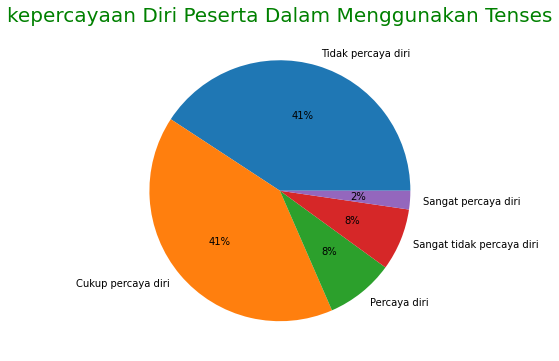

In [24]:
nilaipdt = data7['Seberapa percaya dirikah Anda dengan kemampuan dalam penggunaan  tenses Bahasa Inggris?'].value_counts().values
judulpdt = data7['Seberapa percaya dirikah Anda dengan kemampuan dalam penggunaan  tenses Bahasa Inggris?'].value_counts().index

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(nilaipdt, labels = judulpdt, autopct='%1.0f%%')
ax.set_title('kepercayaan Diri Peserta Dalam Menggunakan Tenses', color = 'green', size = 20)

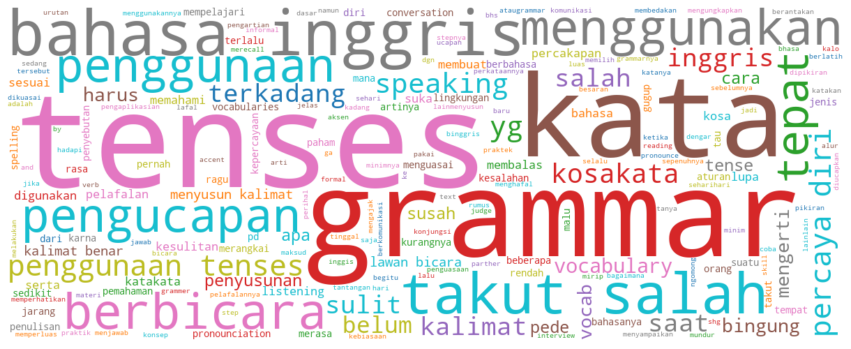

In [25]:
data7['Apa saja tantangan yang kamu hadapi saat menggunakan bahasa inggris?'] = data7['Apa saja tantangan yang kamu hadapi saat menggunakan bahasa inggris?'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali','kurang']

# Create and generate a word cloud image:
ide_words = ' '.join(data7['Apa saja tantangan yang kamu hadapi saat menggunakan bahasa inggris?'].dropna().apply(cleaningText).values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Hal Yang Perlu Diimprove Menurut Peserta', size=20, color='green', pad=15)
plt.axis("off")
plt.show()

## **Data 8 Post-Survey_ Rumus Excel Untuk Pekerja Kantoran Aliyah**

In [26]:
data8 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/PunyaMereka/27_10_2021 Post-Survey_ Rumus Excel Untuk Pekerja Kantoran.xlsx")
data8

,Timestamp,ID,"Setelah mengikuti acara kami, seberapa percaya dirikah Anda untuk menggunakan fungsi dan rumus dalam Microsoft Excel?",Ket,"Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [COUNTIF, SUMIF]",Ket2,"Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [Perhitungan dasar (basic calculations)]",Ket3,"Setelah mengikuti acara kami, seberapa pahamkah Anda dalam menggunakan rumus atau fungsi berikut dalam Microsoft Excel? (1 = Tidak paham sama sekali, 5 = Sangat paham) [VLOOKUP]",Ket4,...,"Menurut Anda, seberapa memuaskan kah topik yang disajikan di acara ini?",Ket6,Seberapa memanfaat kah acara ini dalam membantu Anda meningkatkan kemampuan Anda dalam dunia kerja?,Ket7,Silakan berikan penilaian terhadap acara secara keseluruhan.,Ket8,"Dari skala 1-10, seberapa mungkin Anda merekomendasikan acara/program MyEduSolve kepada orang lain?",Hal apa yang paling Anda sukai dari acara ini?,Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?,"MyEduSolve akan selalu membantumu dalam meraih masa depan impian, yuk kasih ide buat topik webinar selanjutnya!"
0,2021-10-27 14:46:54.162,4145,3,Cukup Puas,2,Tidak Puas,4,Puas,2,Tidak Puas,...,3,Cukup Puas,3,Cukup Puas,4,Puas,7,NaN,NaN,NaN
1,2021-10-27 14:47:24.416,2109,5,Sangat Puas,5,Sangat Puas,5,Sangat Puas,5,Sangat Puas,...,5,Sangat Puas,5,Sangat Puas,5,Sangat Puas,9,Memberikan materi excel dengan sangat jelas da...,Pemateri sangat bagus,Excel lagi tidak apa apa :D
2,2021-10-27 14:47:26.124,3784,4,Puas,3,Cukup Puas,3,Cukup Puas,3,Cukup Puas,...,5,Sangat Puas,5,Sangat Puas,5,Sangat Puas,10,NaN,NaN,Mengenai publik speaking
3,2021-10-27 14:47:28.792,2530,5,Sangat Puas,5,Sangat Puas,5,Sangat Puas,5,Sangat Puas,...,4,Puas,5,Sangat Puas,5,Sangat Puas,9,NaN,NaN,NaN
4,2021-10-27 14:47:28.830,1458,5,Sangat Puas,5,Sangat Puas,5,Sangat Puas,5,Sangat Puas,...,5,Sangat Puas,5,Sangat Puas,5,Sangat Puas,10,Semuanya,Banyak,Oke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2021-10-28 14:59:45.203,2162,5,Sangat Puas,4,Puas,4,Puas,3,Cukup Puas,...,4,Puas,4,Puas,5,Sangat Puas,10,berguna untuk mengolah data,Power Point,Power Point
442,2021-10-29 06:47:23.713,4187,5,Sangat Puas,3,Cukup Puas,3,Cukup Puas,3,Cukup Puas,...,5,Sangat Puas,5,Sangat Puas,5,Sangat Puas,10,Tambah ilmu yg brmnfaat,Rutin buat acara dgn topik yg lebih menarik me...,Cara lolos test interview utk usia >40th
443,2021-10-29 12:19:58.370,3748,4,Puas,4,Puas,4,Puas,5,Sangat Puas,...,4,Puas,5,Sangat Puas,4,Puas,9,Pemberian materi yang jelas,NaN,Pelatihan adobe photoshop
444,2021-10-30 21:04:49.421,1466,4,Puas,4,Puas,4,Puas,3,Cukup Puas,...,5,Sangat Puas,5,Sangat Puas,4,Puas,8,Cara menjelaskannya yang sangat detail,Kalau bisa durasi acara bisa di persingkat lagi.,Webinar tentang bisnis dong kak


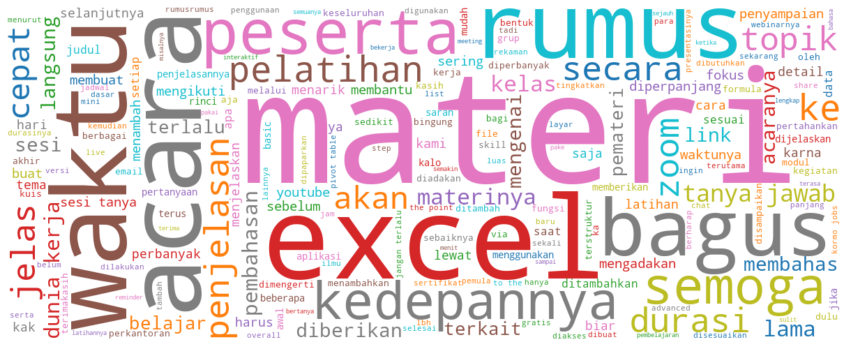

In [27]:
data8['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'] = data8['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali','kurang','dari','yg']

# Create and generate a word cloud image:
ide_words = ' '.join(data8['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'].dropna().apply(cleaningText).values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Hal Yang Perlu Diimprove Menurut Peserta', size=20, color='green', pad=15)
plt.axis("off")
plt.show()

## **Data 9 Post-Survey_ English Language Workshop Aliyah**

In [28]:
data9 = pd.read_excel("/content/drive/My Drive/Colab Notebooks/PunyaMereka/10_11_2021 Post-Survey_ English Language Workshop.xlsx")
data9

,Timestamp,ID,"Setelah mengikuti acara kami, seberapa percaya dirikah Anda untuk mulai berbicara Bahasa Inggris ?","Setelah mengikuti acara kami, seberapa percaya dirikah Anda untuk mulai berbicara Bahasa Inggris ?2","Setelah mengikuti acara kami, seberapa familier kah Anda dengan penggunaan tenses dalam kalimat berbahasa inggris?","Setelah mengikuti acara kami, seberapa familier kah Anda dengan penggunaan tenses dalam kalimat berbahasa inggris?2","Setelah mengikuti acara kami, seberapa pahamkah Anda dengan konsep tenses?","Menurut Anda, seberapa memuaskan kah topik yang disajikan di acara ini?",Mohon untuk memberikan rating untuk instruktur.,Mohon untuk memberikan rating kelas Penggunaan Tenses yang Baik Dalam Menyusun Kalimat,Seberapa bermanfaat kah acara ini dalam membantu meningkatkan kemampuan Anda pada Penggunaan Tenses yang Baik Dalam Menyusun Kalimat?,"Dari skala 1-10, seberapa mungkin Anda merekomendasikan Masterclass Penggunaan Tenses yang Baik Dalam Menyusun Kalimat ?",Hal apa yang paling Anda sukai dari acara ini?,Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?,"MyEduSolve akan selalu membantumu dalam meraih masa depan impian, yuk kasih ide buat topik webinar selanjutnya!"
0,2021-11-12 16:17:57.326,5074,5,Sangat Percaya Diri,5,Sangat Familier,5,5,5,5,5,10,NaN,NaN,NaN
1,2021-11-12 16:18:42.322,1082,5,Sangat Percaya Diri,5,Sangat Familier,5,5,5,5,5,9,Penjelasannya mudah dimengerti dan materinya m...,NaN,NaN
2,2021-11-12 16:18:52.068,6499,5,Sangat Percaya Diri,5,Sangat Familier,5,5,5,5,5,10,Pembicara sangan friendly,Mudahan semakin banyak event yang diadakan,Safety K3
3,2021-11-12 16:19:17.000,1148,5,Sangat Percaya Diri,5,Sangat Familier,5,5,5,5,5,9,Menarik dan sangat interaktif,Mungkin bisa lebih detail dalam memberikan con...,"Grammar, verb, dan simple past tenses"
4,2021-11-12 16:19:21.112,7869,4,Percaya Diri,4,Familier,3,4,4,4,4,6,Mudah dimengerti penyampaiannya,Agar bisa diakses di zoom,Kisi-kisi lolos BUMN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021-11-12 21:03:47.857,6996,5,Sangat Percaya Diri,5,Sangat Familier,5,5,5,5,5,8,Semuanya suka,Lebih di perbaiki,Tentang Dasar Dasar bahasa inggris apa barista
86,2021-11-12 21:22:36.102,2120,4,Percaya Diri,5,Sangat Familier,5,5,5,5,5,10,Banyak ilmu yang didapat,NaN,Ms Excel untuk administrasi perkantoran
87,2021-11-13 07:50:33.326,4741,4,Percaya Diri,4,Familier,5,5,5,5,5,9,Memberikan kepercayaan diri dalam berbicara da...,Semoga kedepannya lebih maksimal lagi materi t...,Cara mengetahui potensi diri dalam memahami ba...
88,2021-11-13 18:15:54.047,8154,4,Percaya Diri,4,Familier,3,4,4,4,4,7,Penjelasan dan contoh yang mudah dipahami,Tema lebih beragam,"Personal Branding, Linkedln, Wawancara, FGD Di..."


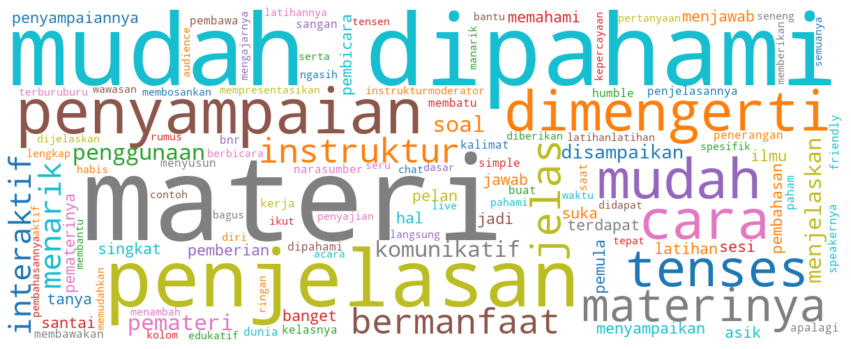

In [29]:
data9['Hal apa yang paling Anda sukai dari acara ini?'] = data9['Hal apa yang paling Anda sukai dari acara ini?'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali','kurang','dari','yg','bahasa inggris','bahasa','inggris']

# Create and generate a word cloud image:
ide_words = ' '.join(data9['Hal apa yang paling Anda sukai dari acara ini?'].dropna().apply(cleaningText).values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Hal Yang Perlu Diimprove Menurut Peserta', size=20, color='green', pad=15)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Kemahiran Peserta Dalam Memahami Konsep Dasar Tenses')

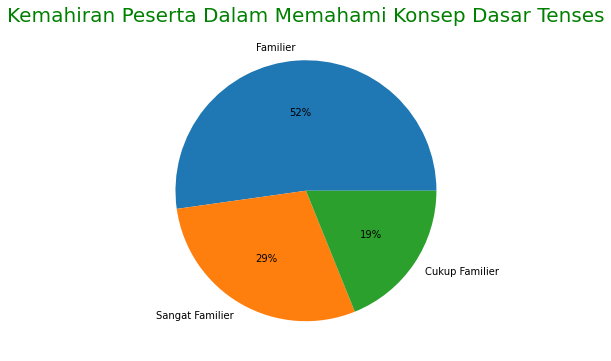

In [30]:
nilaift = data9['Setelah mengikuti acara kami, seberapa familier kah Anda dengan penggunaan tenses dalam kalimat berbahasa inggris?2'].value_counts().values
judulft = data9['Setelah mengikuti acara kami, seberapa familier kah Anda dengan penggunaan tenses dalam kalimat berbahasa inggris?2'].value_counts().index

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(nilaift, labels = judulft, autopct='%1.0f%%')
ax.set_title('Kemahiran Peserta Dalam Memahami Konsep Dasar Tenses', color = 'green', size = 20)

Text(0.5, 1.0, 'kepercayaan Diri Peserta Dalam Menggunakan Tenses')

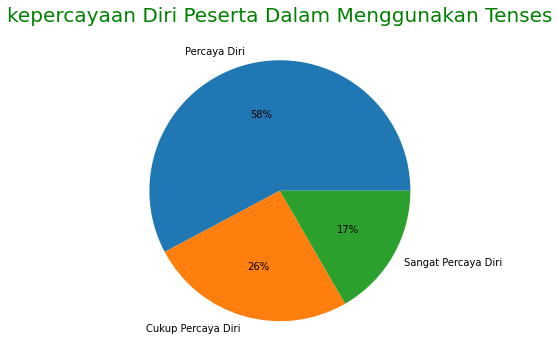

In [31]:
nilaipdt2 = data9['Setelah mengikuti acara kami, seberapa percaya dirikah Anda untuk mulai berbicara Bahasa Inggris ?2'].value_counts().values
judulpdt2 = data9['Setelah mengikuti acara kami, seberapa percaya dirikah Anda untuk mulai berbicara Bahasa Inggris ?2'].value_counts().index

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(nilaipdt2, labels = judulpdt2, autopct='%1.0f%%')
ax.set_title('kepercayaan Diri Peserta Dalam Menggunakan Tenses', color = 'green', size = 20)

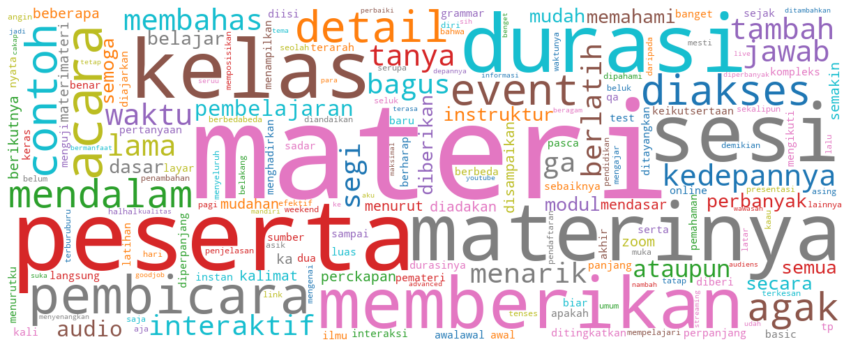

In [32]:
data9['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'] = data9['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'].str.lower()

# Create wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=[15,8])

STOPWORDS =['webinar', 'webinarwebinar', 'bisa','lagi','nya','yang','dalam','dan','baik','juga','sangat','sudah','tapi','lebih','banyak',
            'lebih','di','tidak','mungkin','seperti','dengan','pada','karena','saya','juga','ada','cukup','tetapi','agar','dapat','sehingga',
            'kalau','masih','lain','memang','supaya','untuk','atau','tentang','ini','kembali','kurang','dari','yg','bahasa inggris','bahasa','inggris']

# Create and generate a word cloud image:
ide_words = ' '.join(data9['Menurut kamu hal apa yang bisa kami improve untuk acara kami ke depannya?'].dropna().apply(cleaningText).values)
wordcloud = WordCloud(colormap="tab10",
                      width=1200,
                      height=480,
                      normalize_plurals=False,
                      background_color="white",
                      stopwords = STOPWORDS,
                      random_state=5).generate(ide_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Hal Yang Perlu Diimprove Menurut Peserta', size=20, color='green', pad=15)
plt.axis("off")
plt.show()